In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # numpy arrays / linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # map plot
import warnings
warnings.filterwarnings('ignore') 

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
from scipy.optimize import curve_fit # predictive modeling
import seaborn as sns
import statsmodels.api as sm

import datetime
from datetime import date

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/country_vaccinations.csv', index_col='date', parse_dates=True, engine='python', header=0)
df = df[df['vaccines']=='Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac']['daily_vaccinations']
df.dropna(inplace=True)
df = df.reset_index()
df.head()

,date,daily_vaccinations
0,2020-12-16,187500.0
1,2020-12-17,187500.0
2,2020-12-18,187500.0
3,2020-12-19,187500.0
4,2020-12-20,187500.0


In [4]:
df=df.rename(columns={'date':'ds', 'daily_vaccinations':'y'})
df.head()

,ds,y
0,2020-12-16,187500.0
1,2020-12-17,187500.0
2,2020-12-18,187500.0
3,2020-12-19,187500.0
4,2020-12-20,187500.0


In [6]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True)
model.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
161,2022-12-31
162,2023-01-31
163,2023-02-28
164,2023-03-31
165,2023-04-30


In [8]:
forecast = model.predict(future)

In [9]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
161,2022-12-31,5.619191e+07,3.788553e+07,7.290003e+07,3.745742e+07,7.287898e+07,16823.928022,16823.928022,16823.928022,16823.928022,16823.928022,16823.928022,0.0,0.0,0.0,5.620873e+07
162,2023-01-31,5.875970e+07,3.895130e+07,7.680069e+07,3.886008e+07,7.711991e+07,-15021.580398,-15021.580398,-15021.580398,-15021.580398,-15021.580398,-15021.580398,0.0,0.0,0.0,5.874468e+07
163,2023-02-28,6.107900e+07,4.028126e+07,8.053053e+07,4.020743e+07,8.071963e+07,-15021.580398,-15021.580398,-15021.580398,-15021.580398,-15021.580398,-15021.580398,0.0,0.0,0.0,6.106398e+07
164,2023-03-31,6.364679e+07,4.133461e+07,8.438749e+07,4.109869e+07,8.456528e+07,22257.830367,22257.830367,22257.830367,22257.830367,22257.830367,22257.830367,0.0,0.0,0.0,6.366905e+07
165,2023-04-30,6.613175e+07,4.251045e+07,8.790784e+07,4.206480e+07,8.812950e+07,8169.212207,8169.212207,8169.212207,8169.212207,8169.212207,8169.212207,0.0,0.0,0.0,6.613992e+07


In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
161,2022-12-31,5.620873e+07,3.788553e+07,7.290003e+07
162,2023-01-31,5.874468e+07,3.895130e+07,7.680069e+07
163,2023-02-28,6.106398e+07,4.028126e+07,8.053053e+07
164,2023-03-31,6.366905e+07,4.133461e+07,8.438749e+07
165,2023-04-30,6.613992e+07,4.251045e+07,8.790784e+07


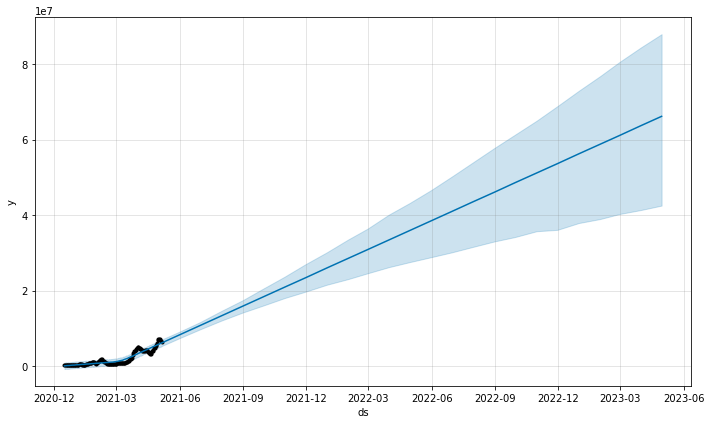

In [11]:
model.plot(forecast);

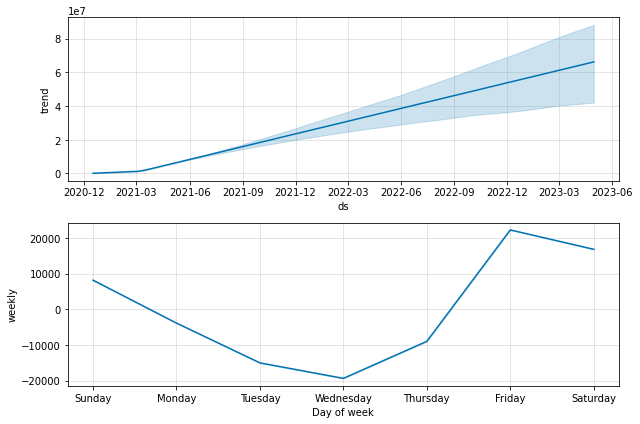

In [12]:
model.plot_components(forecast);

In [13]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [14]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
137,2021-05-02,5.838200e+06,7205286.0
138,2021-05-03,5.908999e+06,7202286.0
139,2021-05-04,5.980673e+06,6945571.0
140,2021-05-05,6.059152e+06,6531714.0
141,2021-05-06,6.152368e+06,6324429.0


In [16]:
from sklearn.metrics import r2_score
r2_score(metric_df.y, metric_df.yhat)

0.8854391177303298

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(metric_df.y, metric_df.yhat)

437748525540.529

In [20]:
metric_df.y.mean()

1967914.0

In [21]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(metric_df.y, metric_df.yhat))

486656.2152592966


In [22]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(metric_df.y, metric_df.yhat))

411114.53060619807


In [23]:
from math import sqrt
rmse = sqrt(mean_squared_error(metric_df.y, metric_df.yhat))
print(rmse)

661625.6687436855
